# Antibody Packing Angle analysis

## Import

In [3]:
from pathlib import Path
from typing import Union, List
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import json
% matplotlib inline

UsageError: Line magic function `%` not found.


## Configuration

In [4]:
BASE = Path("/Users/lynnricky/scripts/CDR-modelling-evaluation")

config = {
    "input": {
        "abymod": BASE.joinpath("output/run_profit_abpackingangle/abymod"),
        "IgFold": BASE.joinpath("output/run_profit_abpackingangle/IgFold"),
        "lyra": BASE.joinpath("output/run_profit_abpackingangle/lyra"),
        "rosetta": BASE.joinpath("output/run_profit_abpackingangle/rosetta")
    },
    "output": {
        "figures": BASE.joinpath("analysis/packing_angle")
    }
}

## Function

In [5]:
# extract abdb_angle and model_angle from json files
def load_json_as_df(input_dir: Path, method_type: str = None):
    result = []
    json_fps = input_dir.glob(f"*.json")
    for json_fp in json_fps:
        with open(json_fp, "r") as f:
            data = json.load(f)
            result.append(
                [
                    data["abdb_id"],
                    data["abdb_angle"],
                    data["model_angle"],
                ]
            )
    df = pd.DataFrame(result)
    df.columns = ["abdbid", "abdb_angle", "model_angle"]
    if method_type:
        df["method"] = [method_type] * df.shape[0]
    return df

## Main

In [6]:
df = pd.concat([load_json_as_df(config["input"]["abymod"], method_type="abYmod"),
                load_json_as_df(config["input"]["lyra"], method_type="lyra"),
                load_json_as_df(config["input"]["IgFold"], method_type="IgFold"),
               load_json_as_df(config["input"]["rosetta"], method_type="Rosetta")], axis=0)
df.reset_index(drop=True, inplace=True )

In [7]:
df

,abdbid,abdb_angle,model_angle,method
0,3o6k_0,-49.254896,-45.453835,abYmod
1,3u46_1,-48.269836,-47.039367,abYmod
2,3q6g_1,-56.583349,-42.737555,abYmod
3,6mee_1,-43.685120,-47.214086,abYmod
4,3dif_1,-46.752652,-47.280005,abYmod
...,...,...,...,...
4045,5b6f_1,-45.696443,-43.215033,Rosetta
4046,4lly_1,-45.068598,-46.383095,Rosetta
4047,2eh7_0,-46.057577,-45.755114,Rosetta
4048,1d5i_0,-43.016424,-42.192881,Rosetta


In [8]:
df["packing_angle"]=abs(df["abdb_angle"]-df["model_angle"])

In [9]:
'''
output:
1. csv_file
    a.summary_interval-number of sequences in each H3_rmsd interval & H3 mean
    b.Distribution_plot-density plot contains rmsd values of H1, H2, H3, L1, L2, L3
'''

'''load csv file and add a column specifying method adopted'''
df_result_angle_abymod = pd.read_csv(
    "/Users/lynnricky/PycharmProjects/final_project_draft/tmp/csv_result/result_angle_abymod")
df_result_angle_abymod['method'] = ["abymod"] * len(df_result_angle_abymod)
df_result_angle_abymod_update = pd.read_csv(
    "/Users/lynnricky/PycharmProjects/final_project_draft/tmp/csv_result/result_angle_abymod_update")
df_result_angle_abymod_update['method'] = ["abymod_update"] * len(df_result_angle_abymod_update)
df_result_angle_igfold = pd.read_csv(
    "/Users/lynnricky/PycharmProjects/final_project_draft/tmp/csv_result/result_angle_igfold")
df_result_angle_igfold['method'] = ["igfold"] * len(df_result_angle_igfold)
df_result_angle_lyra = pd.read_csv(
    "/Users/lynnricky/PycharmProjects/final_project_draft/tmp/csv_result/result_angle_lyra")
df_result_angle_lyra['method'] = ["lyra"] * len(df_result_angle_lyra)
#df_result_angle_Ablooper=pd.read_csv("/tmp/csv_result/result_angle_Ablooper")
#df_result_angle_abymod['method']=["Ablooper"]*len(df_result_angle_Ablooper)


'''construct lyra dataframe excluding sequences that used as template'''

with open("/Users/lynnricky/PycharmProjects/final_project_draft/dataset/nontemplate_lyra_testcase", "r") as f:
    data = f.read()
    non_template = (data.split("\n"))[:-1]
non_template_prefix = []
for i in non_template:
    id = re.match(r"([A-Za-z\d]{4})", (i.lower())).group(0)
    non_template_prefix.append(id)
print(non_template_prefix)
abdb_id = df_result_angle_lyra["abdb_id"].values.tolist()

prefix_list = []
for i in abdb_id:
    for k in non_template_prefix:
        if (re.match(r"([A-Za-z\d]{4})", i).group(0)) == k:
            prefix_list.append(i)
        else:
            pass

df_result_angle_lyra = df_result_angle_lyra.loc[df_result_angle_lyra["abdb_id"].isin(prefix_list)]

df_complete_dict = {'abymod': {}, "abymod_update": {}, "igfold": {}, "lyra": {}}

df_result_angle = [df_result_angle_abymod, df_result_angle_abymod_update, df_result_angle_igfold, df_result_angle_lyra]


def concat_df(list):
    df = pd.concat(list, ignore_index=True)
    return df


df_angle = concat_df(df_result_angle)

['1uz6', '1xf2', '2a6j', '2vl5', '3eyo', '3qo1', '3rvt', '3sgd', '3tnn', '3w9d', '3wii', '4ebq', '4f33', '4g5z', '4g6k', '4gay', '4gw1', '4gw5', '4hkz', '4jfx', '4kaq', '4ma3', '4poz', '4rir', '4wuk', '4xbg', '4yhp', '4yhy', '4yny', '4ztp', '5ayu', '5bvj', '5dk3', '5esq', '5etu', '5euk', '5f88', '5ff6', '5ggq', '5ggu', '5gks', '5gs1', '5hpm', '5hyq', '5i2i', '5i76', '5i8e', '5icx', '5icy', '5icz', '5id0', '5id1', '5iop', '5ir1', '5itf', '5iv2', '5ivz', '5k8a', '5mvj', '5myo', '5n2k', '5t1k', '5t1l', '5t1m', '5th2', '5ukq', '5vga', '5vh3', '5vh4', '5wk2', '5x4g', '5xhg', '5y9k', '6au5', '6axp', '6ayn', '6azk', '6azl', '6b0w', '6bhz', '6bi0', '6bi2', '6dc7', '6df0', '6e65', '6hkg', '6n35', '6o3k', '6obz', '6q1g', '6qbc', '6uga', '6ugs', '6ugt', '6ugu', '6ugv', '6umh', '6umi', '6umj', '6vi2', '6vl9', '6xul', '6z7x', '6ztf', '7dr4', '7n3g', '7n3h', '7o4y']


In [28]:
df
df.to_csv("/Users/lynnricky/Downloads/angles.csv")

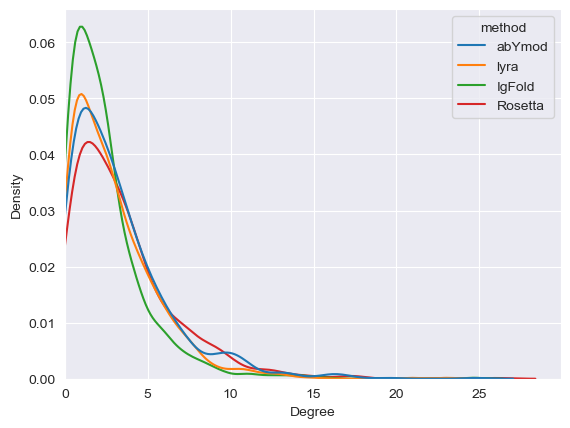

In [36]:
#plotting
#g = sns.FacetGrid(df_angle, hue="method")
#g.map_dataframe(sns.kdeplot, x="rmsd", hue="method",palette="viridis", legend=True)
#g.map(sns.kdeplot, "packing_angle")
#g.add_legend()
#g.fig.suptitle("packing_angle")
#g.fig.subplots_adjust(top=0.9)
#g.set(xlim=(0, 2))
a=sns.kdeplot(data=df, x="packing_angle", hue="method")
#g.tick_params(axis="x", bottom=True, labelbottom=True)
#g.tick_params(axis="y", left=True, labelleft=True)
#fig, axes = plt.subplots(2, 3, figsize=(9, 6), sharex="all
# ", sharey="all")
#df_1_local_H3 = df_1_local.loc[df_1_local["cdr"] == "H3"]
plt.xlabel("Degree")
plt.xlim(0,)
#df_1_local_H3 = df_1_local.loc[df_1_local["cdr"] == "H3"]

# density plot
#p = sns.kdeplot(data=df_1_local_H3 , x="rmsd", hue="method", fill=True, common_norm=False, alpha=0.6, palette="viridis", legend=False)
# control x limit
#plt.xlim(0, 100)
plt.savefig("/Users/lynnricky/scripts/CDR-modelling-evaluation/analysis/packing_angle/angle_densityplot.png", dpi=300, transparent=False)
plt.savefig("/Users/lynnricky/scripts/CDR-modelling-evaluation/analysis/packing_angle/angle_densityplot.pdf",transparent=False)

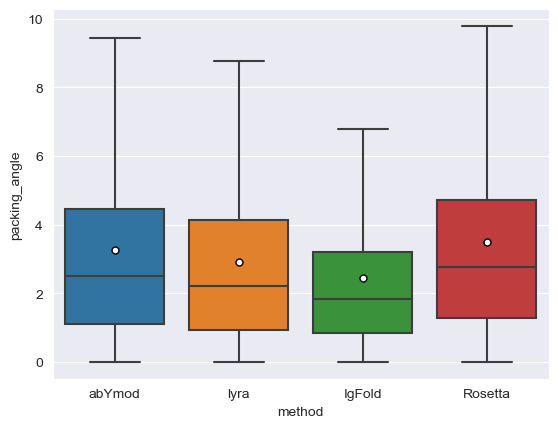

In [34]:
compare=sns.boxplot(x="method", y="packing_angle",
            data=df, showfliers = False, showmeans=True,meanprops={"marker":"o",
                       "markerfacecolor":"white",
                       "markeredgecolor":"black",
                      "markersize":"5"})
plt.savefig("/Users/lynnricky/scripts/CDR-modelling-evaluation/analysis/packing_angle/angle_boxplot.png",dpi=300)
plt.savefig("/Users/lynnricky/scripts/CDR-modelling-evaluation/analysis/packing_angle/angle_boxplot.pdf")

In [14]:
a=print(len(df[(df["method"]=="abYmod")& (df["packing_angle"]<=3)]))
b=print(len(df[(df["method"]=="abYmod")]))
591/1087

591
1087


0.5436982520699172

In [17]:
a=print(len(df[(df["method"]=="lyra")& (df["packing_angle"]<=3)]))
b=print(len(df[(df["method"]=="lyra")]))
602/981

602
981


0.6136595310907238

In [20]:
a=print(len(df[(df["method"]=="IgFold")& (df["packing_angle"]<=3)]))
b=print(len(df[(df["method"]=="IgFold")]))
741/1023

741
1023


0.7243401759530792

In [22]:
a=print(len(df[(df["method"]=="Rosetta")& (df["packing_angle"]<=3)]))
b=print(len(df[(df["method"]=="Rosetta")]))
520/959

520
959


0.5422314911366006

In [23]:
print((df[df["method"]=="abYmod"])["packing_angle"].mean())
print((df[df["method"]=="abYmod"])["packing_angle"].median())
print((df[df["method"]=="abYmod"])["packing_angle"].std())

3.270544270873788
2.498513499999998
3.0256513720125486


In [24]:
print((df[df["method"]=="IgFold"])["packing_angle"].mean())
print((df[df["method"]=="IgFold"])["packing_angle"].median())
print((df[df["method"]=="IgFold"])["packing_angle"].std())

2.441042301980198
1.8404434999999992
2.373294360633899


In [25]:
print((df[df["method"]=="lyra"])["packing_angle"].mean())
print((df[df["method"]=="lyra"])["packing_angle"].median())
print((df[df["method"]=="lyra"])["packing_angle"].std())

2.918498181352459
2.2200929999999985
2.619552791448296


In [26]:
print((df[df["method"]=="Rosetta"])["packing_angle"].mean())
print((df[df["method"]=="Rosetta"])["packing_angle"].median())
print((df[df["method"]=="Rosetta"])["packing_angle"].std())

3.4897979885297206
2.7651540000000026
3.0771640985530833
